In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./models/')
from SIRH import *

In [56]:
df=pd.read_csv('hospitalized.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
hospitalized=np.array(df).reshape(len(df))

In [57]:
s_0=1000000 -1
i_0=1
r_0=0
h_0=0
t=len(hospitalized)
dt=0.001
split=t-1

In [58]:
try : 
    SIRH=SIRH_model_2()
    SIRH.choose_model(True, True, True)
    SIRH.train( hospitalized[:split])
    S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH.beta,SIRH.gamma_i, SIRH.gamma_h, SIRH.h, split, dt)
    plt.plot(hospitalized[:split], label='True data')
    plt.plot(H, label = 'SIRH prediction ')
    plt.xlabel('days')
    plt.ylabel('Number of hospitalized people')
    plt.title('Comparison of SIRH with both gamma fixed to real data')
    plt.legend()
    plt.show()
    %matplotlib inline
    SIRH.plot(7, 0.05)
except: 
    print('error')
    pass


gammas constants


In [59]:
try:     
    SIRH_bis=SIRH_model_2()
    SIRH_bis.choose_model(False, True, True)
    SIRH_bis.train( hospitalized[:split])
    S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH.beta,SIRH.gamma_i, SIRH.gamma_h, SIRH.h, split, dt)
    plt.plot(hospitalized[:split], label='True data')
    plt.plot(H, label = 'SIRH prediction ')
    plt.xlabel('days')
    plt.ylabel('Number of hospitalized people')
    plt.title('Comparison of SIRH with  gamma_i free and gamma_h fixed to real data')
    plt.legend()
    plt.show()
    %matplotlib inline
    SIRH.plot(7, 0.05)
except: 
    print('error')
    pass


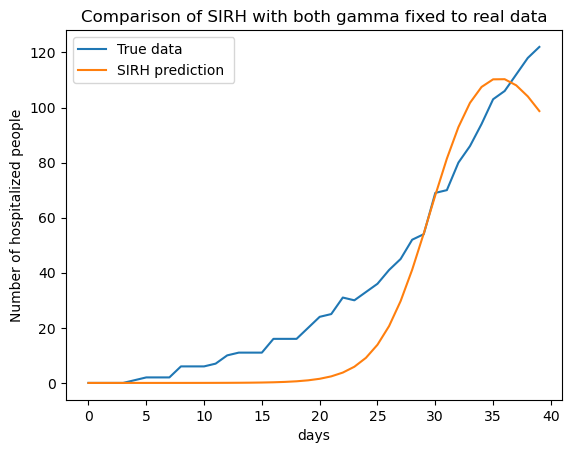

In [60]:
try: 
    SIRH_ter = SIRH_model_2()
    SIRH_ter.choose_model(False, False, True)
    SIRH_ter.train( hospitalized[:split])
    S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH.beta,SIRH.gamma_i, SIRH.gamma_h, SIRH.h, split, dt)
    plt.plot(hospitalized[:split], label='True data')
    plt.plot(H, label = 'SIRH prediction ')
    plt.xlabel('days')
    plt.ylabel('Number of hospitalized people')
    plt.title('Comparison of SIRH with  gamma_i and gamma_h free to real data')
    plt.legend()
    plt.show()
    %matplotlib inline
    SIRH.plot(7, 0.05)
except: 
    print('error')
    pass



In [61]:
try:     
    SIRH_quater = SIRH_model_2()
    SIRH_quater.choose_model(False, True, True)
    SIRH_quater.train( hospitalized[:split])
    S, I, R, H=run_sirh([s_0, i_0, r_0, h_0], SIRH.beta,SIRH.gamma_i, SIRH.gamma_h, SIRH.h, split, dt)
    plt.plot(hospitalized[:split], label='True data')
    plt.plot(H, label = 'SIRH prediction ')
    plt.xlabel('days')
    plt.ylabel('Number of hospitalized people')
    plt.title('Comparison of SIRH with  gamma_i free and gamma_h fixed to real data')
    plt.legend()
    plt.show()
    %matplotlib inline
    SIRH.plot(7, 0.05)
except: 
    print('error')
    pass





delta-method
